# CASE 1 - Heart Disease Classification 
Tony Kuitunen 1503242    
last updated: 31.01.2018    
Cognitive Systems for Health Technology Applications    
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## 1. Objectives

##### Making a neural network for studying heart disease
The aim of this assignment is to learn to read data from externals sources using panda’s io-
functions and use keras.io dense neural networks to make an expert system to support in
diagnostic decision making.

## 2. Required libraries

#### Start with importing the tools and data

In [242]:
#import libraries
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import models
from keras import layers

import matplotlib.pyplot as plt
import tensorflow as tf

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

## 3. Data description and preprocessing

In [308]:
#import data
names = ['age','sex','cp','tresbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names=names, na_values='?')
dataframe.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#### Describe data:

#### Check correlations on the data

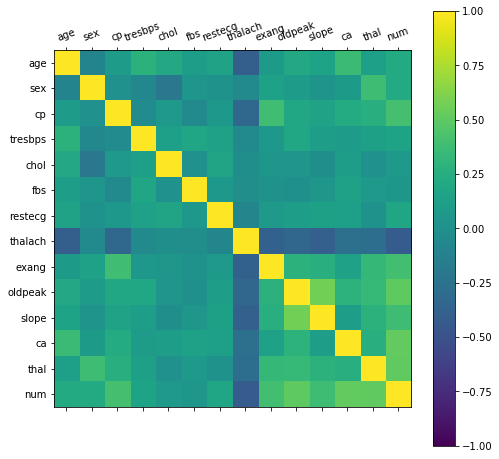

In [244]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,dataframe.shape[1],1)
ax.set_xticks(ticks);
ax.set_yticks(ticks);
ax.set_xticklabels(names, rotation=20);
ax.set_yticklabels(names);


From the correlations the "num" as result of heart disease and "thalach" as max heart rate have a strong negative correlation, meaning it seems to lower with the condition. Also, "thal", "ca", "oldpeak" and "cp" seem to correlate with the output of heart disease.<br><br>
40 oldpeak = ST depression induced by exercise relative to rest    
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect    
44 ca: number of major vessels (0-3) colored by flourosopy    
9 cp: chest pain type    
<PRE>
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
</PRE>

#### Check how the data is distributed in histograms

because many of the columns have different ranges the bins are better set auto-adjusted

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200DC5D8B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000200DDFA0BA8>]], dtype=object)

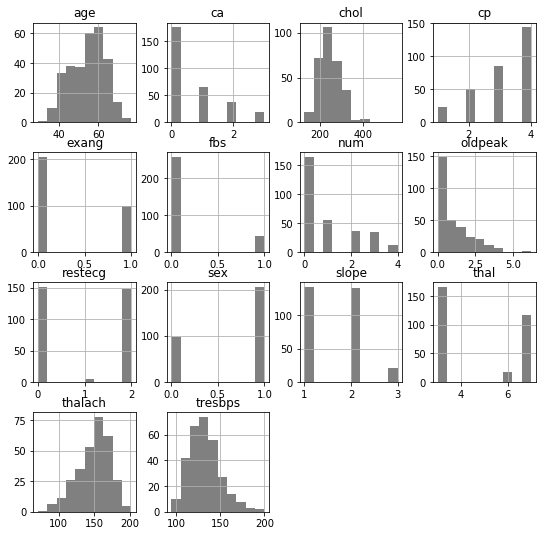

In [245]:
dataframe.hist(figsize=(9,9), color='grey')

the data includes a lot of healthy persons in comparison to different stages of the disease, but all in all the diseased/healthy ratio is good. Some of the features like age, cholesterol (chol), max heart rate(thalach) and resting blood pressure (tresbps) have nice normal distribution with tilt as others like slope of the pulse (slope) are harder to analyze from this as they are not comparable in numbers.<br><br>From this the binary features "exang", "fbs" and "sex" columns might give better results with variotion from -1 to 1

#### Preprocess:     
Check NaN values from data and convert them to mean of the column

In [309]:
dataframe = dataframe.where(~np.isnan(dataframe),dataframe.mean(),axis='columns')
print(np.sum(np.isnan(dataframe)))

age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64


calculate and make the output data, This makes the scaling of the disease 0 or 1 (false or true)  
then make the input data from these columns

In [310]:
labels = (dataframe['num'] > 0).values
columns = ['age','sex','cp','tresbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
data = dataframe[columns]

scale the data with scaler to be between -1 and 1

In [311]:
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)
print("scale:\n",min_max_scaler.scale_,"\nMin:\n", min_max_scaler.min_)

scale:
 [ 0.02083333  1.          0.33333333  0.00943396  0.00228311  1.          0.5
  0.00763359  1.          0.16129032  0.5         0.33333333  0.25      ] 
Min:
 [-0.60416667  0.         -0.33333333 -0.88679245 -0.28767123  0.          0.
 -0.54198473  0.          0.         -0.5         0.         -0.75      ]


split the data into training and validation sets

In [249]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled, labels, test_size = 0.3)

## 4. Modeling and compilation




create the NN model and train it

In [250]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ["accuracy"])



## 5. Training and Validation

In [251]:
N = 100
h = model.fit(x_train, y_train, 
              verbose = 0, 
              epochs = N, 
              batch_size = 128,
validation_data = (x_test, y_test))

## 6. Evaluation

#### Plot the graphs to evaluate the model

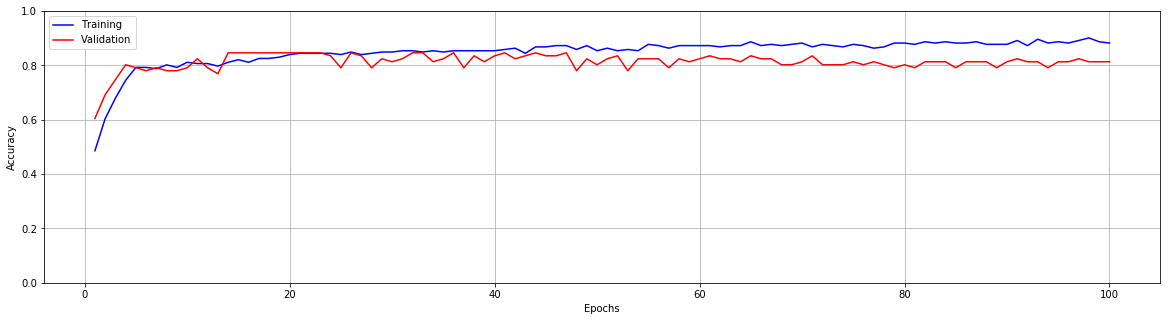

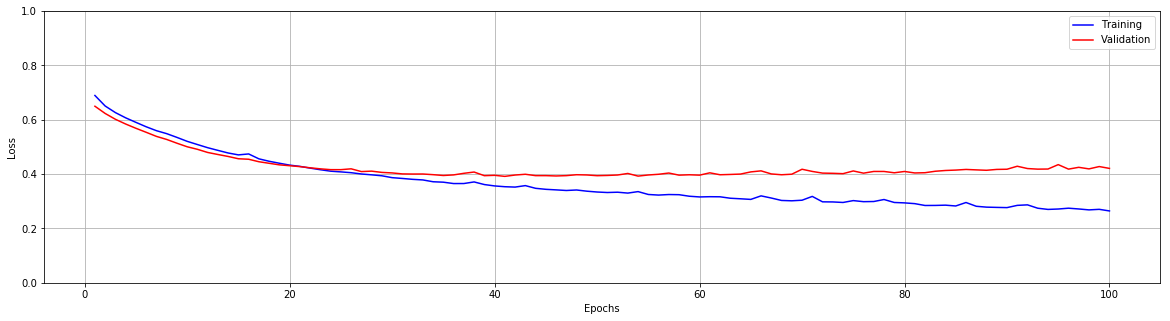

In [252]:
#make functions to plot result to easen the future work

#accuracy plot
def accplot(hist, n_epochs):
    epochs = range(1, n_epochs + 1)
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.figure(figsize = (20, 5))
    plt.plot(epochs, acc, "blue", label = "Training")
    plt.plot(epochs, val_acc, "red", label = "Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim([0, 1])
    plt.grid()
    plt.legend()
    plt.show

#loss plot
def lossplot(hist,n_epochs):
    epochs = range(1, n_epochs + 1)
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.figure(figsize = (20, 5))
    plt.plot(epochs, loss, "blue", label = "Training")
    plt.plot(epochs, val_loss, "red", label = "Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.ylim([0, 1])
    plt.grid()
    plt.legend()
    plt.show


accplot(h, N)
lossplot(h, N)


Seems that the model seems to overfit in about 40 epochs in. 

## 6.1 Tweaking the model

Make a smaller network to make it more general, add more epochs

In [280]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=13))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ["accuracy"])

N2 = 300
h2 = model.fit(x_train, y_train, 
              verbose = 0, 
              epochs = N2, 
              batch_size = 128,
validation_data = (x_test, y_test))

Graph it

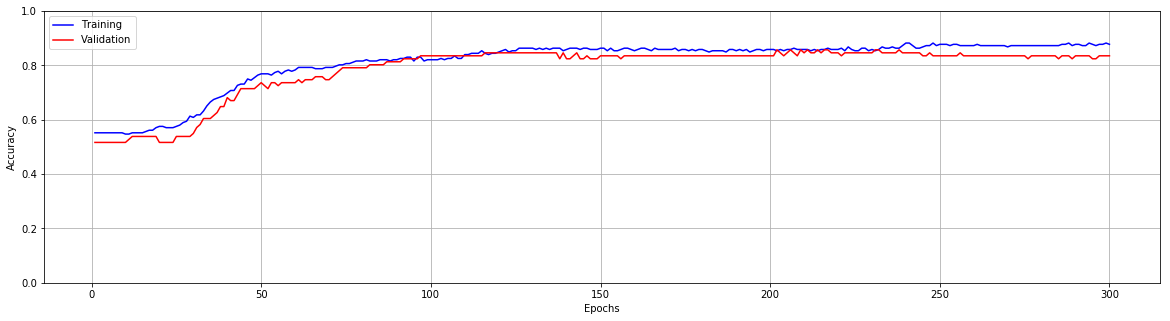

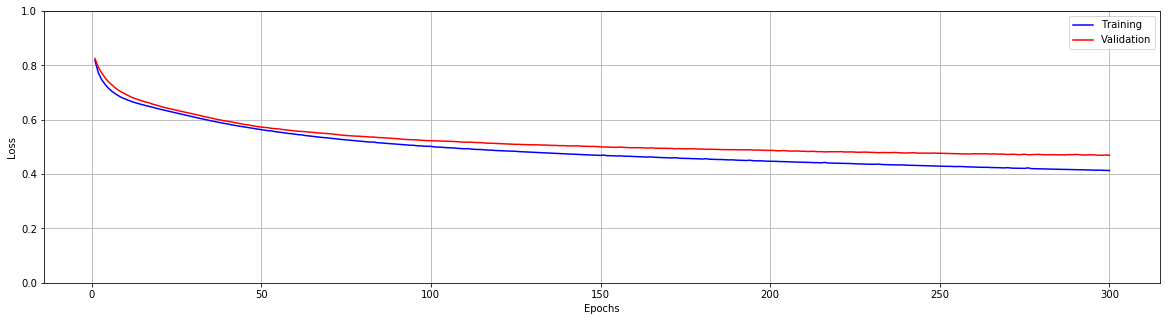

In [281]:
accplot(h2, N2)
lossplot(h2, N2)

This seems to get the accuracy to somewhere 83%. Though this might not be accurate, k-fold validation would show the more real validation accuracy

In [282]:
#The accuracy at last epoch
h2.history["val_acc"][-1]

0.83516484498977661

### Try different optimizer

Use Adam as optimizer, increase epochs and make the network thinner

In [287]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=13))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

N3 = 170
h3 = model.fit(x_train, y_train, 
              verbose = 0, 
              epochs = N3, 
              batch_size = 128,
validation_data = (x_test, y_test))

Graph it

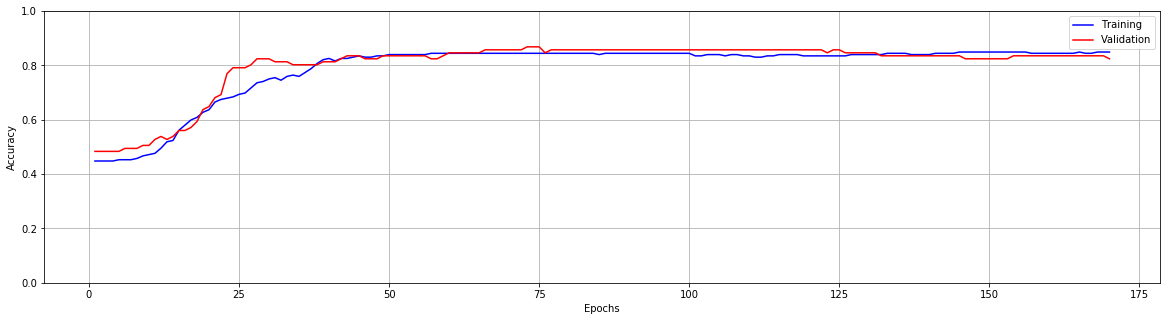

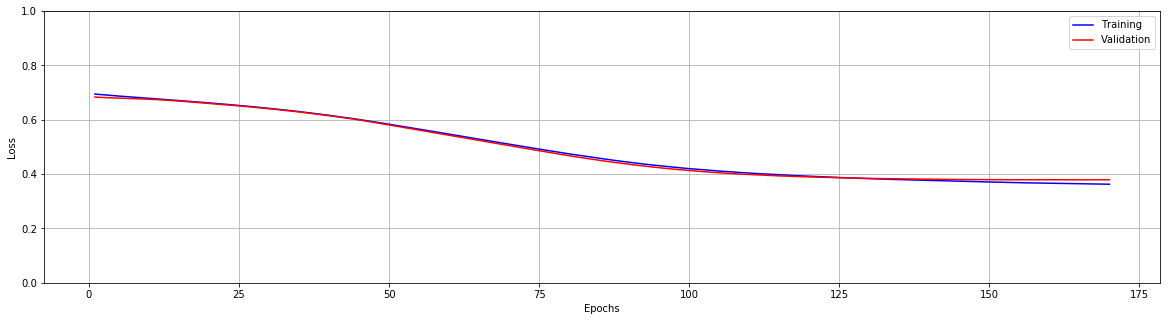

In [288]:
accplot(h3, N3)
lossplot(h3, N3)

With Adam and tweaked meters the accuracy can get to at least the same levels. It gets to a bit faster there. Adam introduces Momentum to the loss function calculation and might find a bit better minimum in some cases.

In [289]:
h3.history["val_acc"][-1]

0.82417583465576172

#### Take additional data from different group to test the set
The model is trained with a train/test-set that causes validation to be too accurate, lets see if it happens with a new set.
Using the Hungarian processed data set

In [298]:
hun_dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", names=names, na_values='?')
#print before
print("Samples: ", hun_dataframe.shape, "\nBefore:\n",np.sum(np.isnan(hun_dataframe)))

hun_dataframe = hun_dataframe.where(~np.isnan(hun_dataframe),hun_dataframe.mean(),axis='columns')
print("After:\n",np.sum(np.isnan(hun_dataframe)))

Samples:  (294, 14) 
Before:
 age          0
sex          0
cp           0
tresbps      1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
slope      190
ca         291
thal       266
num          0
dtype: int64
After:
 age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64


Looking at the Hungarian data it seems that "ca" is NaN for every sample and "thal" and "slope" is for over half of the samples. Using this data with the model that was previously might not work that well. Ideal would be to drop these columns from the original model also before using it to test this data set. For interest the original is left as it is and lets see what happens. 

calculate and make the output data, This makes the scaling of the disease 0 or 1 (false or true)  
then make the input data from these columns

In [299]:
hun_labels = (hun_dataframe['num'] > 0).values
columns = ['age','sex','cp','tresbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
hun_data = hun_dataframe[columns]

scale the data with scaler to be between -1 and 1

In [302]:
hun_min_max_scaler = preprocessing.MinMaxScaler()
hun_data_scaled = hun_min_max_scaler.fit_transform(hun_data)
print("scale:\n",hun_min_max_scaler.scale_,"\nMin:\n", hun_min_max_scaler.min_)

scale:
 [ 0.02631579  1.          0.33333333  0.00925926  0.0019305   1.          0.5
  0.00925926  1.          0.2         0.5         1.          0.25      ] 
Min:
 [-0.73684211  0.         -0.33333333 -0.85185185 -0.16409266  0.          0.
 -0.75925926  0.          0.         -0.5         0.         -0.75      ]


In [326]:
hun_loss, hun_acc = model.evaluate(hun_data, hun_labels)
print("loss: ", hun_loss, " acc: ", hun_acc)

294/294 [==============================] - 0s 170us/step
loss:  5.81128615028  acc:  0.639455782313


Looking at this the model only get to 64%, which shows there is quite some work to do. The accuracy is very poor and useless. All of the data sets should be combined and used then to predict.

## 7. Results and Discussion

Below is first the original tweaked graphs and then same used with adam as optimizer

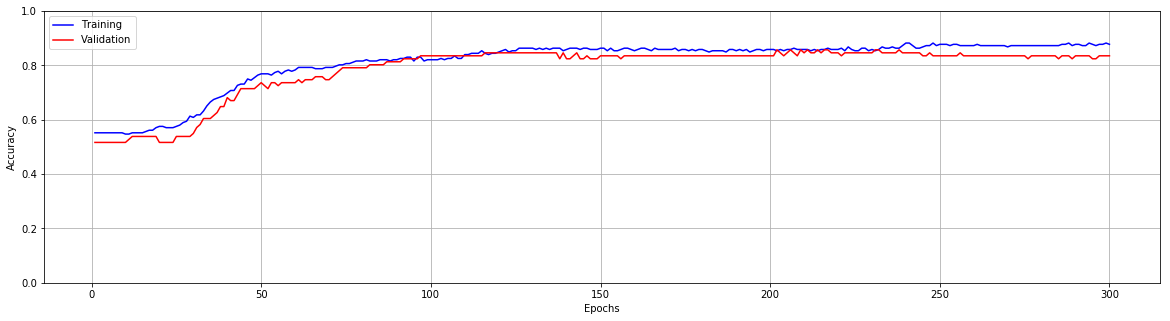

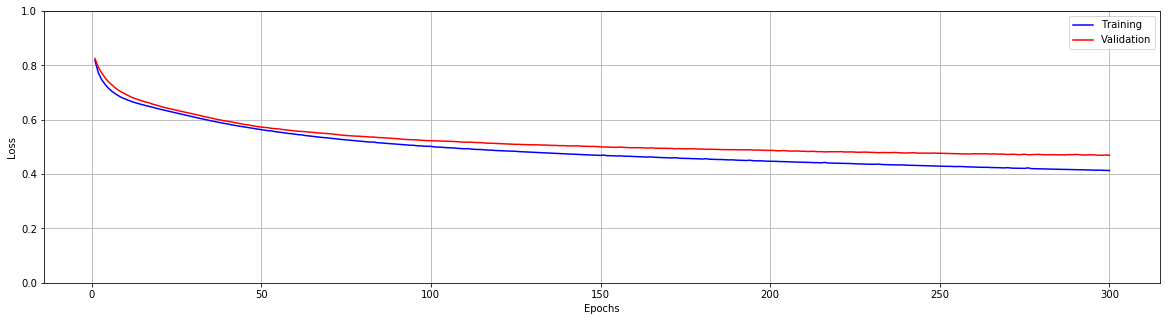

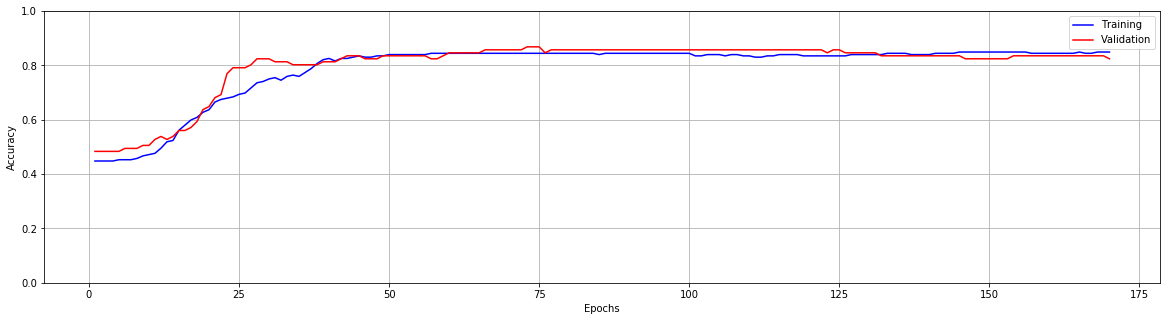

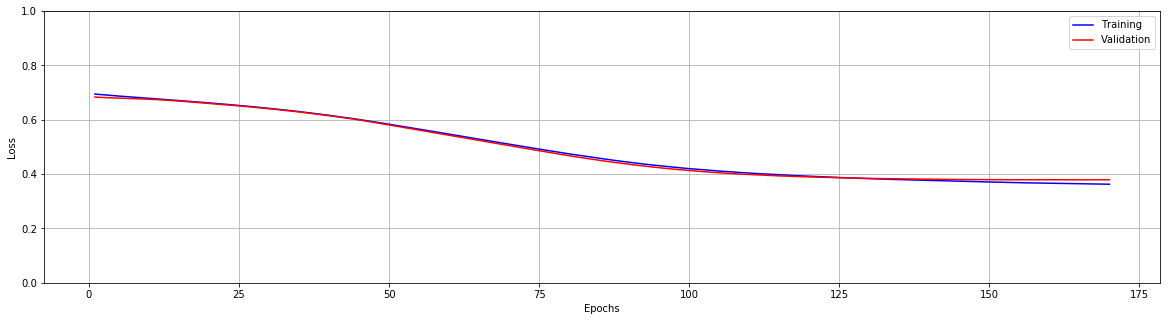

In [293]:

plt.figure();
accplot(h2, N2)
lossplot(h2, N2)

plt.figure();
accplot(h3, N3)
lossplot(h3, N3)

From these you can see the loss function rmsprop going in a much more convex way as adam takes a "more unlinear" curve. Adam also has the momentum in it so it gets over the first "hill" at 0-25 epochs. With multiple runs both end up in the same 82-84% region of accuracy, adam with a little less epochs in this task.

Going to the Hungarian data it shows how important it is to have matching data, and to preprocess the data to clear as much ground as possible.

Cleveland scale:
 [ 0.02083333  1.          0.33333333  0.00943396  0.00228311  1.          0.5
  0.00763359  1.          0.16129032  0.5         0.33333333  0.25      ] 
Cleveland Min:
 [-0.60416667  0.         -0.33333333 -0.88679245 -0.28767123  0.          0.
 -0.54198473  0.          0.         -0.5         0.         -0.75      ]


hungarian scale:
 [ 0.02631579  1.          0.33333333  0.00925926  0.0019305   1.          0.5
  0.00925926  1.          0.2         0.5         1.          0.25      ] 
hungarian Minimums:
 [-0.73684211  0.         -0.33333333 -0.85185185 -0.16409266  0.          0.
 -0.75925926  0.          0.         -0.5         0.         -0.75      ]


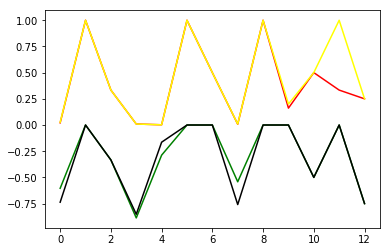

In [324]:
print("Cleveland scale:\n",min_max_scaler.scale_,"\nCleveland Min:\n", min_max_scaler.min_)
print("\n\nhungarian scale:\n",hun_min_max_scaler.scale_,"\nhungarian Minimums:\n", hun_min_max_scaler.min_)
plt.plot(np.arange(0,13), min_max_scaler.scale_, color='Red', label="cleveland scale")
plt.plot(np.arange(0,13), min_max_scaler.min_, color='Green', label="cleveland min")
plt.plot(np.arange(0,13), hun_min_max_scaler.scale_, color='Yellow', label="hungarian scale")
plt.plot(np.arange(0,13), hun_min_max_scaler.min_, color='Black', label="hungarian scale")

The lines give a nice hint in which attributes the data changes between the two scaled data sets. Hungarian "ca" feature missing is clearly shown.

In [327]:
print("loss: ", hun_loss, " acc: ", hun_acc)

loss:  5.81128615028  acc:  0.639455782313


The accuracy when testing the cleveland trained model with hungarian data show they are not comparable. 64% is just slighty better than tossing a coin whether the subject has a disease or not. Taking the hungarian data to the training would definetly make the accuracy better but would also mean that some attributes would need to be dropped out to maintain trustable data.

## 8. Conclusions

Having tried multiple sigmoid activation functions, bigger and smaller networks is seems that quite small network is just good to maintain it to be generally usable. The data is quite small for neural network and taking all the data sets would improve this. rmsprop and Adam are both very well behaving as optimizers in this task, only minor differences in the speed they optain their target, but with such a small sample size it does not make a difference. K-Fold validation would have been good to use to get a bit thighter interval between results, as they varied aroun 82-86%.     
      
The model was not fit to be used to make any conclusion on the test subjects in hungary, making predictions whether they had or didnt have heart disease was just slightly better than tossing a coin.